<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Briam Pavel Aguirre Moisés  <br>
Fecha: 28/05/2023

# Importación de librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

# Parte II. Clasificación

In [2]:
#Para esta actividad se importarán las siguientes librerías:
os.chdir("C:/Users/bpagu/Desktop/UNIR/3. Técnicas de Inteligencia Artificial/Actividades/Actividad 2")

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [3]:
#Código para cargar el Dataset
#url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
df = pd.read_csv("train.csv")

## Descripción de la fuente del Dataset

Haga una descripción de la fuente de datos utilizada (Incluya los enlaces necesarios).

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [4]:
# Número de instancias en total
df.shape[0]

8068

**Número de instancias en total** Se tiene un total de 8068 instancias

In [5]:
# Número de atributos de entrada
df.shape[1]-1

11

**Número de atributos de entrada** Son 11 atributos de entrada, se detalla a continuación su significado y tipo

- **ID:** Código único (Categórica nominal).
- **Gender:** Género (Categórica nominal).
- **Ever_Married:** Estado matrimonial (Categórica nominal).
- **Age:** Edad (Numérica continua).
- **Graduated:** Graduado o no (Categórica nominal).
- **Profession:** Profesión (Categórica nominal).
- **Work Experience:** Experiencia trabajando en años (Numérica discreta).
- **Spending Score:** Puntaje de gasto (Categórica ordinal).
- **Family Size:** Cantidad de miembros en la familia (Numérica discreta).
- **Var_1:** Categoría anónima (Categórica nominal).

In [6]:
# Número de clases de la variable objetivo
df["Segmentation"].unique()

array(['D', 'A', 'B', 'C', 'E'], dtype=object)

**Número de clases del target:** Existen cinco clases en la variable Segmentación, cada clase representa una segmentación distinta y el valor que toma es de tipo categórico.

In [7]:
# Número de instancias pertenecientes a cada clase en el target
pd.value_counts(df["Segmentation"])

C    1970
B    1858
D    1617
A    1418
E    1205
Name: Segmentation, dtype: int64

**Número de instancias pertenecientes al target:** Se muestra la cantidad de instancias por clase del target, siendo la segmentación C la que más instancias tiene y la E la de menor. 

In [8]:
# Estadísticas de la variable objetivo
df["Segmentation"].describe()

count     8068
unique       5
top          C
freq      1970
Name: Segmentation, dtype: object

**Estadísticas de la variable objetivo:**

In [ ]:
# Estadísticas de los atributos en relación con la variable objetivo


**Estadísticas de los atributos en relación a la variable objetivo:**

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [9]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2

Eliminamos de nuesto dataset las variables ID por no contener información relevante y Var_1 por ser una variable desconocida 

In [10]:
df = df.drop(columns = ["ID","Var_1","Unnamed: 0"])
df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


Imputamos los valores missings 

In [11]:
pd.pivot_table(df, index = "Segmentation", aggfunc=lambda x: x.mode().iat[0])

,Age,Ever_Married,Family_Size,Gender,Graduated,Profession,Spending_Score,Work_Experience
Segmentation,,,,,,,,
A,35,No,2.0,Male,Yes,Artist,Low,0.0
B,43,Yes,2.0,Male,Yes,Artist,Low,1.0
C,50,Yes,2.0,Male,Yes,Artist,Average,1.0
D,22,No,4.0,Male,No,Healthcare,Low,0.0
E,53,Yes,1.0,Male,Yes,Lawyer,Low,1.0


In [12]:
df["Ever_Married"] = df.groupby(["Segmentation"])["Ever_Married"].apply(lambda x: x.fillna(x.mode().iat[0]))
df["Graduated"] = df.groupby(["Segmentation"])["Graduated"].apply(lambda x: x.fillna(x.mode().iat[0]))
df["Profession"] = df.groupby(["Segmentation"])["Profession"].apply(lambda x: x.fillna(x.mode().iat[0]))
df["Family_Size"] = df.groupby(["Segmentation"])["Family_Size"].apply(lambda x: x.fillna(x.mean()))
df["Work_Experience"] = df["Work_Experience"].replace(np.nan,1)

Discretizamos las variables cuantitativas

In [13]:
df["Age"] = pd.cut(x = df["Age"], bins = [16,18,26,59,df["Age"].max()] , labels = ["Adolescencia","Juventud","Adultez","Vejez"])
df["Work_Experience"] = pd.cut(x = df["Work_Experience"], bins = [-1,2,6,df["Work_Experience"].max()], labels = ["Junior","Semi-Senior","Senior"])
df["Family_Size"] = pd.cut(x = df["Family_Size"], bins = [0,3,6,df["Family_Size"].max()] , labels = ["Pequeña","Mediana","Grande"])

Hacemos uso de variables dummies para nuestras variables categóricas nominales.

In [14]:
df_new = pd.get_dummies(df, columns = ["Gender","Ever_Married","Graduated","Profession"], drop_first = True)

Hacemos uso del One Hot Encoder para nuestras variables categóricas ordinales

In [15]:
a = ["Low","Average","High"]
b = ["A","B","C","D","E"]
c = ["Adolescencia","Juventud","Adultez","Vejez"]
d = ["Junior","Semi-Senior","Senior"]
e = ["Pequeña","Mediana","Grande"]
encoder = OrdinalEncoder(categories = [a,b,c,d,e])
df_new_encoder = encoder.fit_transform(df_new[["Spending_Score","Segmentation","Age","Work_Experience","Family_Size"]])
df_new_encoder = pd.DataFrame(df_new_encoder,columns = ["Spending_Score","Segmentation","Age","Work_Experience","Family_Size"])

In [16]:
df_new_encoder = df_new_encoder.reset_index()
df_new = df_new.drop(columns = ["Age","Work_Experience","Spending_Score","Family_Size","Segmentation"]).reset_index()

In [17]:
df_new = pd.merge(df_new,df_new_encoder, on = "index" ).drop(columns = ["index"])
df_new.head(5)

,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score,Segmentation,Age,Work_Experience,Family_Size
0,1,0,0,0,0,0,0,1,0,0,0,0.0,3.0,1.0,0.0,1.0
1,0,1,1,0,1,0,0,0,0,0,0,1.0,0.0,2.0,0.0,0.0
2,0,1,1,0,1,0,0,0,0,0,0,0.0,1.0,3.0,0.0,0.0
3,1,1,1,0,0,0,0,0,0,1,0,2.0,1.0,3.0,0.0,0.0
4,0,1,1,0,0,1,0,0,0,0,0,2.0,0.0,2.0,0.0,1.0


**Prueba chi2:** Se realiza la prueba de chi cuadrado para calcular la importancia de cada variable

In [18]:
X_chi = df_new.drop(columns = ["Segmentation"], axis = 1)
y_chi = df_new["Segmentation"]

In [19]:
chi_scores = chi2(X_chi, y_chi)

<AxesSubplot:>

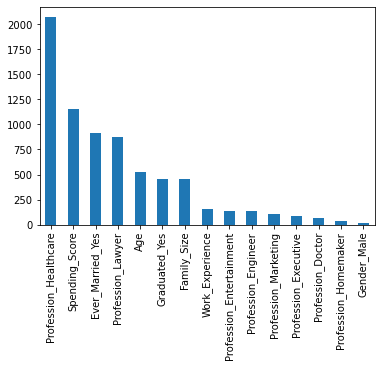

In [20]:
chi_values = pd.Series(chi_scores[0], index = X_chi.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

Después de haber realizado las pruebas de chi cuadrado, se ha optado por no considerar todas las variables sino las 8 más relevantes.

In [21]:
df_new = df_new[["Profession_Healthcare","Spending_Score","Ever_Married_Yes","Profession_Lawyer","Age","Graduated_Yes","Family_Size","Segmentation"]]
df_new.head(5)

,Profession_Healthcare,Spending_Score,Ever_Married_Yes,Profession_Lawyer,Age,Graduated_Yes,Family_Size,Segmentation
0,1,0.0,0,0,1.0,0,1.0,3.0
1,0,1.0,1,0,2.0,1,0.0,0.0
2,0,0.0,1,0,3.0,1,0.0,1.0
3,0,2.0,1,1,3.0,1,0.0,1.0
4,0,2.0,1,0,2.0,1,1.0,0.0


## División del dataset en datos de entrenamiento y datos de test 

In [51]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
X = df_new[df_new.columns[:-1]]
y = df_new["Segmentation"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada 
+ las capas intermedias – al menos dos – 
+ capa de salida
+ funciones de activación

Al menos utiliza relu en algunas de las capas intermedias y utiliza softmax en la capa de salida.

In [25]:
# Código de la estructuración de la red
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Código de la inspección del modelo de red

##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [ ]:
#Código de ajuste y entrenamiento

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [ ]:
#Código de evaluación de la red propuesta (entrenamiento y validación)

### Evalúe los resultados  para el conjunto de test.

In [2]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

In [64]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [71]:
#Código de ajuste del modelo de clasificación 1
model_arbol = tree.DecisionTreeClassifier(max_depth = 8, criterion = "entropy", random_state = 1)
model_arbol.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [72]:
y_arbol = model_arbol.predict(X_test)

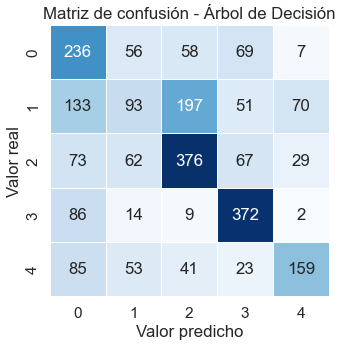

In [73]:
#Código para mostrar la evaluación del modelo de clasificación 1
mlp_matrix = confusion_matrix(y_test,y_arbol)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(mlp_matrix,annot=True, cbar=False, cmap=plt.cm.Blues,linewidth=0.5,fmt="d")
plt.ylabel('Valor real')
plt.xlabel('Valor predicho')
plt.title('Matriz de confusión - Árbol de Decisión');

In [74]:
#Código de ajuste del modelo 2
model_random = RandomForestClassifier(n_estimators = 10, random_state = 1)
model_random.fit(X,y)

RandomForestClassifier(n_estimators=10, random_state=1)

In [75]:
#Código para mostrar ly_random = model_random.predict(X_test)a evaluación de los modelos
y_random = model_random.predict(X_test)

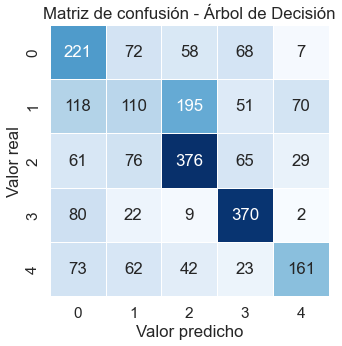

In [76]:
#Código para mostrar la evaluación del modelo de clasificación 1
mlp_matrix = confusion_matrix(y_test,y_random)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(mlp_matrix,annot=True, cbar=False, cmap=plt.cm.Blues,linewidth=0.5,fmt="d")
plt.ylabel('Valor real')
plt.xlabel('Valor predicho')
plt.title('Matriz de confusión - Árbol de Decisión');

In [77]:
len(y_random)

2421

Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.